In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
df = pd.read_csv('./dataset/kddcup_data.csv')

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [93]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [94]:
def plot_countplot(column_name, title, xlabel):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column_name)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Count')
    plt.show()

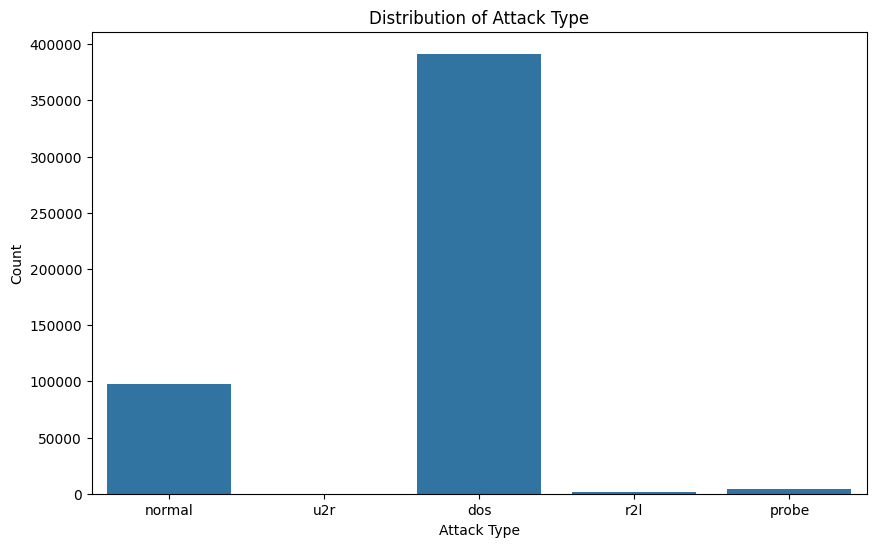

In [95]:
plot_countplot('Attack Type', 'Distribution of Attack Type', 'Attack Type')

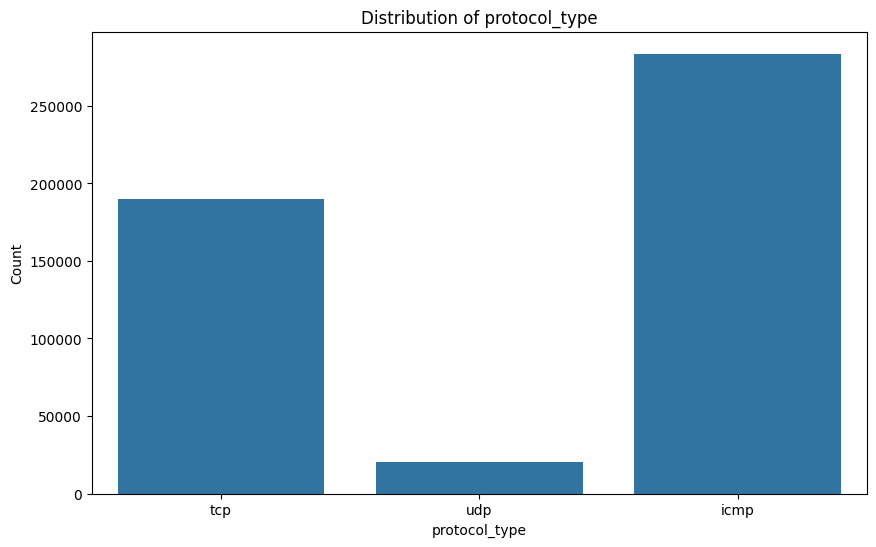

In [96]:
plot_countplot('protocol_type', 'Distribution of protocol_type', 'protocol_type')

In [97]:
# drop target column 
df = df.drop(['target'], axis=1)

# split the data into features and target variable
X = df.drop('Attack Type', axis=1)
y = df['Attack Type']

In [98]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

cat_features = ['protocol_type', 'service', 'flag']

num_features = [
    'duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
    'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
    'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
    'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
    'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
    'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'
]

transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features),
        ('num', StandardScaler(), num_features)
    ]
)


In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [100]:
from sklearn.pipeline import Pipeline


pipeline = Pipeline(
    steps=[
        ('preprocessor', transformer),
        ('model', None)
    ]
)

Training Random Forest...
Results for Random Forest:


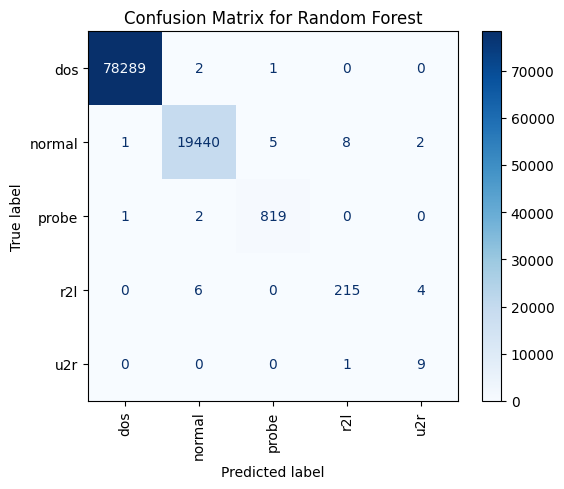

              precision    recall  f1-score   support

         dos       1.00      1.00      1.00     78292
      normal       1.00      1.00      1.00     19456
       probe       0.99      1.00      0.99       822
         r2l       0.96      0.96      0.96       225
         u2r       0.60      0.90      0.72        10

    accuracy                           1.00     98805
   macro avg       0.91      0.97      0.93     98805
weighted avg       1.00      1.00      1.00     98805

Accuracy: 0.9996660088052224
------------------------------------------------------------
Training Naive Bayes...
Results for Naive Bayes:


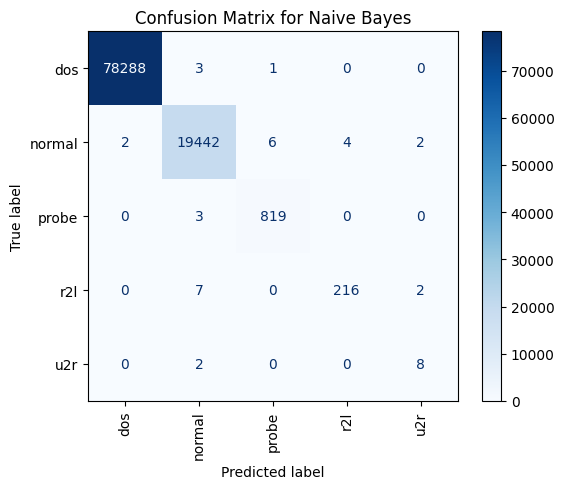

              precision    recall  f1-score   support

         dos       1.00      1.00      1.00     78292
      normal       1.00      1.00      1.00     19456
       probe       0.99      1.00      0.99       822
         r2l       0.98      0.96      0.97       225
         u2r       0.67      0.80      0.73        10

    accuracy                           1.00     98805
   macro avg       0.93      0.95      0.94     98805
weighted avg       1.00      1.00      1.00     98805

Accuracy: 0.9996761297505187
------------------------------------------------------------
Training Support Vector Machine...
Results for Support Vector Machine:


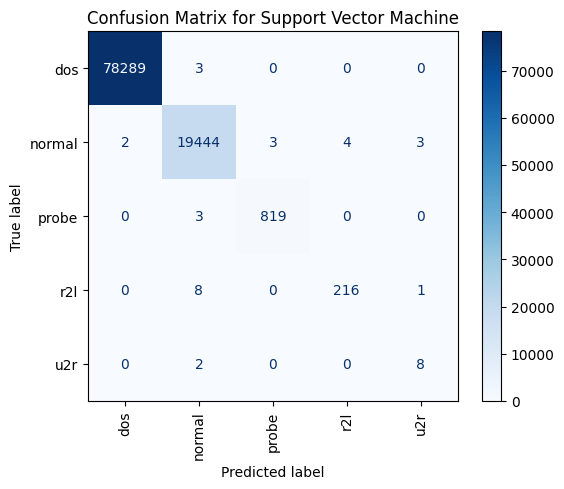

              precision    recall  f1-score   support

         dos       1.00      1.00      1.00     78292
      normal       1.00      1.00      1.00     19456
       probe       1.00      1.00      1.00       822
         r2l       0.98      0.96      0.97       225
         u2r       0.67      0.80      0.73        10

    accuracy                           1.00     98805
   macro avg       0.93      0.95      0.94     98805
weighted avg       1.00      1.00      1.00     98805

Accuracy: 0.9997064925864075
------------------------------------------------------------
Training Logistic Regression...
Results for Logistic Regression:


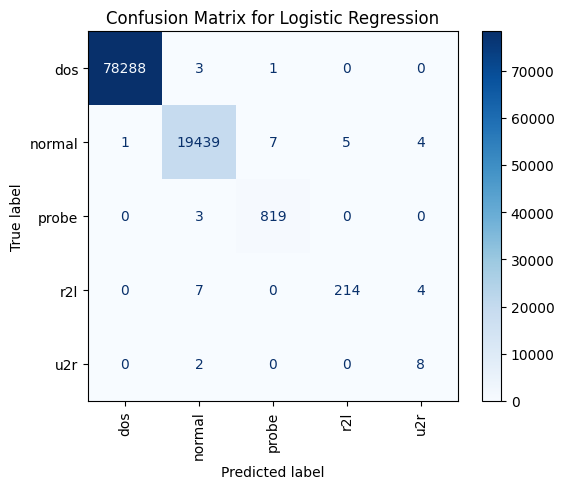

              precision    recall  f1-score   support

         dos       1.00      1.00      1.00     78292
      normal       1.00      1.00      1.00     19456
       probe       0.99      1.00      0.99       822
         r2l       0.98      0.95      0.96       225
         u2r       0.50      0.80      0.62        10

    accuracy                           1.00     98805
   macro avg       0.89      0.95      0.91     98805
weighted avg       1.00      1.00      1.00     98805

Accuracy: 0.9996255250240372
------------------------------------------------------------
Training XGBoost...
Results for XGBoost:


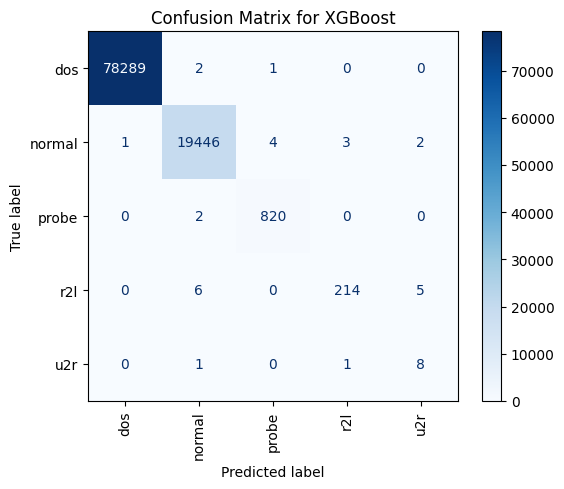

              precision    recall  f1-score   support

         dos       1.00      1.00      1.00     78292
      normal       1.00      1.00      1.00     19456
       probe       0.99      1.00      1.00       822
         r2l       0.98      0.95      0.97       225
         u2r       0.53      0.80      0.64        10

    accuracy                           1.00     98805
   macro avg       0.90      0.95      0.92     98805
weighted avg       1.00      1.00      1.00     98805

Accuracy: 0.9997166135317038
------------------------------------------------------------
Training Decision Tree...
Results for Decision Tree:


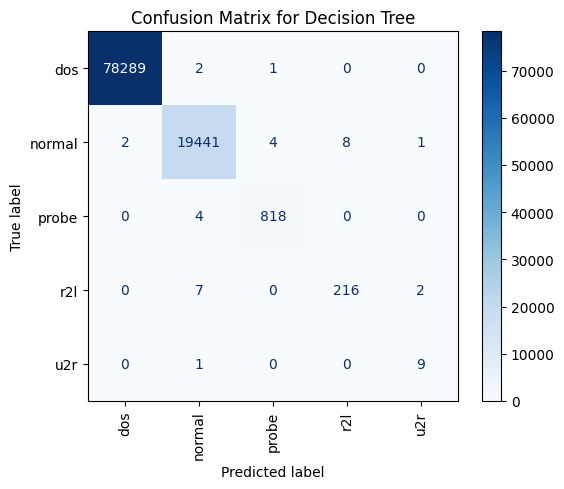

              precision    recall  f1-score   support

         dos       1.00      1.00      1.00     78292
      normal       1.00      1.00      1.00     19456
       probe       0.99      1.00      0.99       822
         r2l       0.96      0.96      0.96       225
         u2r       0.75      0.90      0.82        10

    accuracy                           1.00     98805
   macro avg       0.94      0.97      0.95     98805
weighted avg       1.00      1.00      1.00     98805

Accuracy: 0.9996761297505187
------------------------------------------------------------


In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

models = {
    'Random Forest': pipeline.set_params(model=RandomForestClassifier()),
    'Naive Bayes': pipeline.set_params(model=GaussianNB()),
    'Support Vector Machine': pipeline.set_params(model=SVC()),
    'Logistic Regression': pipeline.set_params(model=LogisticRegression(max_iter=1000)),
    'XGBoost': pipeline.set_params(model=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')),
    'Decision Tree': pipeline.set_params(model=DecisionTreeClassifier())
}


for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Results for {model_name}:")
    
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print("-" * 60)

    # save the model
    import joblib
    joblib.dump(model, f'model_{model_name.replace(" ", "_").lower()}.joblib')
